<a href="https://colab.research.google.com/github/av-sivasai/AI-Powered-Fraud-Management-System-for-UID-Aadhaar/blob/main/Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create Folder Structure**

In [ ]:
import os

os.makedirs("dataset/raw_10000", exist_ok=True)
print("Folders created!")

Folders created!


**Install Required Libraries**

In [ ]:
!pip install faker pillow opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.8 MB/s eta 0:00:00


**Install Fonts**

In [ ]:
!apt-get install -y fonts-dejavu

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra
The following NEW packages will be installed:
  fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
0 upgraded, 3 newly installed, 0 to remove and 2 not upgraded.
Need to get 3,085 kB of archives.
After this operation, 10.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-dejavu all 2.37-2build1 [3,192 B]
Fetched 3,085 kB in 0s (10.9 MB/s)
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-dejavu-core_2.37-2build1_all.deb ...
Unpackin

**Import Libraries + Helper Function**

In [ ]:
import cv2
import numpy as np
from faker import Faker
from PIL import Image, ImageDraw, ImageFont
import random
import os

fake = Faker()

# Generate fake UID-like number
def generate_uid():
    return "{} {} {}".format(
        random.randint(1000, 9999),
        random.randint(1000, 9999),
        random.randint(1000, 9999)
    )

**Synthetic Aadhaar-Like Generator Function**

In [ ]:
def create_aadhaar_like_card(output_path):
    # Card size
    width, height = 900, 600
    card = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(card)

    # Font paths (available in Colab after installing fonts-dejavu)
    font_path_regular = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"
    font_path_bold = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"

    # Load fonts
    name_font = ImageFont.truetype(font_path_bold, 40)
    text_font = ImageFont.truetype(font_path_regular, 32)

    # 🔴 Top red bar
    draw.rectangle([0, 0, width, 80], fill=(255, 90, 0))
    draw.text((20, 20), "NATIONAL IDENTITY CARD", font=name_font, fill="white")

    # 🟩 Bottom green bar
    draw.rectangle([0, height - 60, width, height], fill=(0, 150, 0))
    draw.text((20, height - 50), "For Training Purpose Only", font=text_font, fill="white")

    # 📷 Fake photo box
    draw.rectangle([50, 150, 250, 400], outline="black", width=5)
    draw.text((90, 260), "PHOTO", font=text_font, fill="black")

    # 🔠 Synthetic details
    name = fake.name()
    dob = fake.date_of_birth(minimum_age=18, maximum_age=70).strftime("%d/%m/%Y")
    gender = random.choice(["Male", "Female", "Other"])
    uid = generate_uid()

    draw.text((300, 150), f"Name: {name}", font=text_font, fill="black")
    draw.text((300, 220), f"DOB: {dob}", font=text_font, fill="black")
    draw.text((300, 290), f"Gender: {gender}", font=text_font, fill="black")
    draw.text((300, 360), f"UID: {uid}", font=text_font, fill="black")

    # Save image
    card.save(output_path)

**Generate 10,000 Cards in Batches**

In [ ]:
TOTAL_IMAGES = 10000
BATCH_SIZE = 1000   # 10 batches of 1000

print("Generating 10,000 Aadhaar-like synthetic cards...\n")

for batch in range(1, (TOTAL_IMAGES // BATCH_SIZE) + 1):
    start = (batch - 1) * BATCH_SIZE + 1
    end = batch * BATCH_SIZE

    print(f"Batch {batch}: Generating images {start} to {end}")

    for i in range(start, end + 1):
        output = f"dataset/raw_10000/aadhaar_{i}.png"
        create_aadhaar_like_card(output)

print("\n✔ All 10,000 Aadhaar-like synthetic cards generated successfully!")

Generating 10,000 Aadhaar-like synthetic cards...

Batch 1: Generating images 1 to 1000
Batch 2: Generating images 1001 to 2000
Batch 3: Generating images 2001 to 3000
Batch 4: Generating images 3001 to 4000
Batch 5: Generating images 4001 to 5000
Batch 6: Generating images 5001 to 6000
Batch 7: Generating images 6001 to 7000
Batch 8: Generating images 7001 to 8000
Batch 9: Generating images 8001 to 9000
Batch 10: Generating images 9001 to 10000

✔ All 10,000 Aadhaar-like synthetic cards generated successfully!


**Verify Count**

In [ ]:
len(os.listdir("dataset/raw_10000"))

10000

**Create Preprocessed Folder**

In [ ]:
import os

os.makedirs("dataset/preprocessed_10000", exist_ok=True)
print("Preprocessed folder ready!")

Preprocessed folder ready!


**FULL PREPROCESSING PIPELINE**

In [ ]:
import cv2
import os
import json
import numpy as np

RAW_PATH = "dataset/raw_10000/"
PRE_PATH = "dataset/preprocessed_10000/"
META_PATH = "dataset/metadata_10000.json"

metadata = []

# Rotation Correction
def correct_rotation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binary threshold for contour detection
    _, thresh = cv2.threshold(gray, 0, 255,
                              cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    coords = np.column_stack(np.where(thresh > 0))
    if len(coords) == 0:
        return image  # Skip rotation if blank

    angle = cv2.minAreaRect(coords)[-1]

    # Fix angle range
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Rotate the image
    (h, w) = image.shape[:2]
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)

    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    return rotated


# Full Image Preprocessing
def preprocess_image(image_path, output_path):
    img = cv2.imread(image_path)
    original_h, original_w, original_c = img.shape

    # 1. Rotation correction
    rotated = correct_rotation(img)

    # 2. Resize
    resized = cv2.resize(rotated, (512, 512))

    # 3. Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

    # 4. Noise removal
    denoised = cv2.GaussianBlur(gray, (5, 5), 0)

    # 5. Thresholding (Otsu)
    _, thresh = cv2.threshold(denoised, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save processed image
    cv2.imwrite(output_path, thresh)

    # Store metadata
    metadata.append({
        "filename": os.path.basename(image_path),
        "original_height": original_h,
        "original_width": original_w,
        "channels": original_c,
        "processed_height": 512,
        "processed_width": 512,
        "rotation_corrected": True,
        "grayscale": True,
        "denoising": "GaussianBlur 5x5",
        "thresholding": "Otsu",
        "output_file": output_path
    })


# MAIN PROCESSOR
def run_preprocessing():
    print("🔥 Starting preprocessing for 10,000 images...\n")

    files = sorted(os.listdir(RAW_PATH))

    count = 0

    for file in files:
        input_path = RAW_PATH + file
        output_path = PRE_PATH + file

        preprocess_image(input_path, output_path)
        count += 1

        # Progress update every 500 images
        if count % 500 == 0:
            print(f"Processed {count}/10000 images...")

    # Save metadata
    with open(META_PATH, "w") as f:
        json.dump(metadata, f, indent=4)

    print("\n🎉 Preprocessing Completed!")
    print(f"📄 Metadata saved at: {META_PATH}")
    print("🔥 All 10,000 images are now OCR-ready!")

run_preprocessing()

🔥 Starting preprocessing for 10,000 images...

Processed 500/10000 images...
Processed 1000/10000 images...
Processed 1500/10000 images...
Processed 2000/10000 images...
Processed 2500/10000 images...
Processed 3000/10000 images...
Processed 3500/10000 images...
Processed 4000/10000 images...
Processed 4500/10000 images...
Processed 5000/10000 images...
Processed 5500/10000 images...
Processed 6000/10000 images...
Processed 6500/10000 images...
Processed 7000/10000 images...
Processed 7500/10000 images...
Processed 8000/10000 images...
Processed 8500/10000 images...
Processed 9000/10000 images...
Processed 9500/10000 images...
Processed 10000/10000 images...

🎉 Preprocessing Completed!
📄 Metadata saved at: dataset/metadata_10000.json
🔥 All 10,000 images are now OCR-ready!


**Verify Preprocessed Count**

In [ ]:
len(os.listdir("dataset/preprocessed_10000"))

10000

**Create Train/Test Folders**

In [ ]:
import os

os.makedirs("dataset/train_10000", exist_ok=True)
os.makedirs("dataset/test_10000", exist_ok=True)

print("Train & test folders created!")

Train & test folders created!


**Perform Train/Test Split (80/20)**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

PRE_PATH = "dataset/preprocessed_10000/"
TRAIN_PATH = "dataset/train_10000/"
TEST_PATH = "dataset/test_10000/"

# Get list of all preprocessed files
files = sorted(os.listdir(PRE_PATH))

# Split 80/20
train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

print("Train:", len(train_files))
print("Test:", len(test_files))

# Copy files to train folder
for f in train_files:
    shutil.copy(PRE_PATH + f, TRAIN_PATH + f)

# Copy files to test folder
for f in test_files:
    shutil.copy(PRE_PATH + f, TEST_PATH + f)

print("\n✔ Train/Test Split Completed Successfully!")

Train: 8000
Test: 2000

✔ Train/Test Split Completed Successfully!


**Verify Train/Test Count**

In [ ]:
print("Train images:", len(os.listdir("dataset/train_10000")))
print("Test images:", len(os.listdir("dataset/test_10000")))

Train images: 8000
Test images: 2000


**Show a Grid of Images (3×3 Preview)**

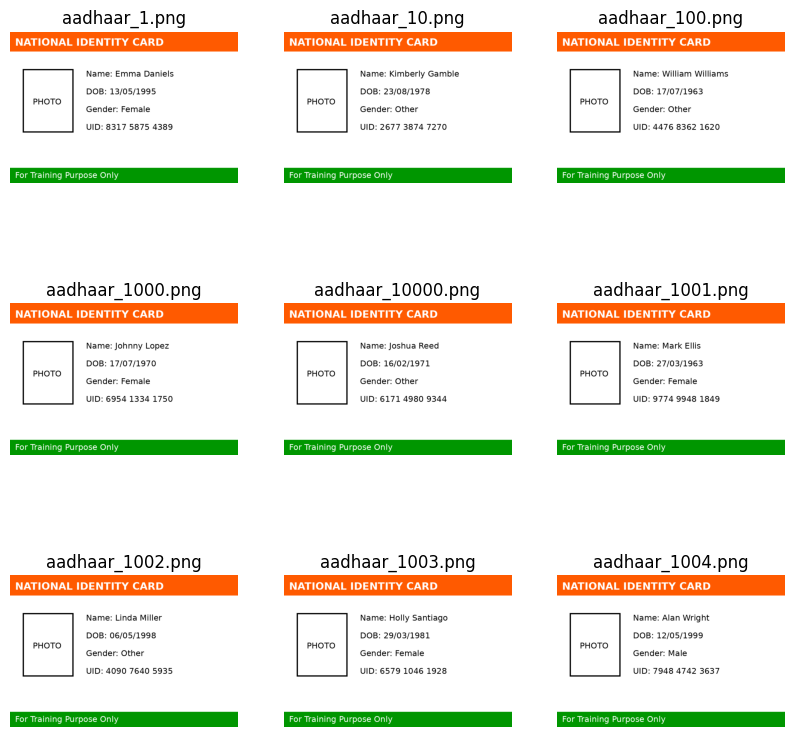

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

folder = "dataset/raw_10000"
images = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10,10))

for i, img_name in enumerate(images):
    img = cv2.imread(f"{folder}/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')

plt.show()